In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import Concurrent_INREG

# INARCH type modèles

Creer des bouts de code pour le calcul de modèles type INARCH:


On s'interesse à des modèles de forme :

$$ x_{i,t} ~ Poisson(l_{i,t})) $$
$$ l_{i,t} = s(t) * f_{\theta}(\frac{x_{i,t-1}}{s(t)}) $$

$f_{\theta}$ choisi dans un ensemble de 
 
Et on cherche les valeurs de 

## I Génération de Données

In [14]:
M = 20
T = 140
al = 1
bet = 100
f_init = lambda x: al *x +bet
f_init_vect = np.vectorize(f_init)

In [15]:
from math import exp, log, sin,pi,cos

season_t =[100+  int(30 *cos(pi/30 * t)) for t in range(T)]

In [16]:
weight = np.random.exponential(0.5, size = M)


In [17]:
mask = np.zeros((M,T))
for i in range(1,M):
    a = int(np.random.uniform(0,T-10))
    b = int(np.random.uniform(1,T-a))
    mask[i,a:a+b] = 1
mask[0,:]=1

In [18]:

x_list= list()
X_cur =  weight * mask[:,0] * season_t[0] /sum(weight * mask[:,0])
for i in range(T):
    x_list.append(X_cur.copy())
    Xsum =  f_init_vect( X_cur/(season_t[i]* weight)).dot( mask[:,i] * weight) 
    X_cur = mask[:,i] *  np.random.poisson(season_t[i] * f_init_vect(X_cur/(season_t[i]* weight)) * weight/Xsum, M)

data_mat = np.concatenate(x_list).reshape(T,M)
data_mat = data_mat[20:-20,:]
season_t = season_t[20:-20]
T = T-40

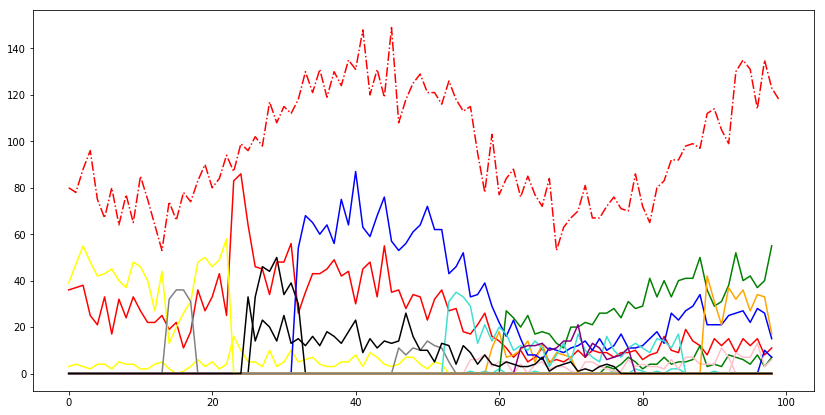

In [19]:
plt.figure(figsize=(14, 7))
plt.gca().set_prop_cycle('color', ['red', 'green', 'blue', 'turquoise','orange', 'purple', 'pink','yellow', 'grey','black'])
plt.plot(data_mat[1:,:])
plt.plot(data_mat.sum(axis=1), '-.')
plt.show()

## II Concurrent models


In [26]:
model = Concurrent_INREG.Concurrent_INAR(season=season_t)
model.estim_weight(data_mat[1:,:])
model.weight = weight
model.fit(data_mat, options ={'disp' : True})
pred = model.pred(data_mat[:-1,:])

In [27]:
model.weight/sum(model.weight)

array([0.04914469, 0.02317937, 0.04160491, 0.00228768, 0.05595537,
       0.0327743 , 0.01757973, 0.00729393, 0.01372805, 0.04081396,
       0.00713542, 0.14107811, 0.08224859, 0.06403485, 0.10724762,
       0.06904197, 0.02827795, 0.07568591, 0.1220534 , 0.01883418])

In [28]:
weight/sum(weight)

array([0.04914469, 0.02317937, 0.04160491, 0.00228768, 0.05595537,
       0.0327743 , 0.01757973, 0.00729393, 0.01372805, 0.04081396,
       0.00713542, 0.14107811, 0.08224859, 0.06403485, 0.10724762,
       0.06904197, 0.02827795, 0.07568591, 0.1220534 , 0.01883418])

In [29]:
model.parameters[1]/model.parameters[0]

0.0036818570426137313

In [30]:
al,bet

(1, 100)

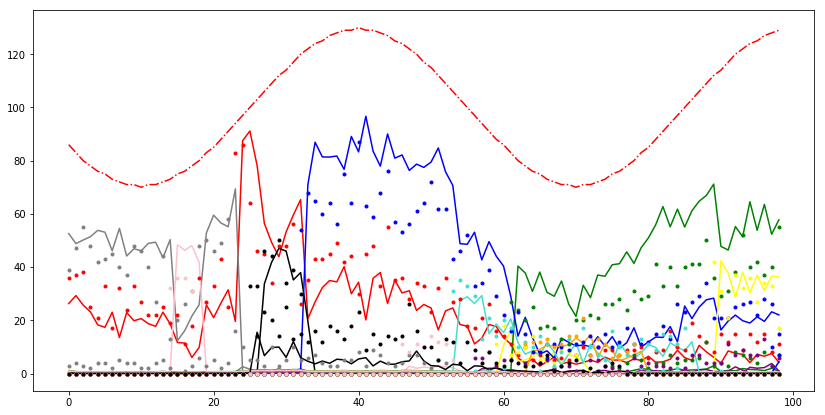

In [32]:
plt.figure(figsize=(14, 7))
plt.gca().set_prop_cycle('color', ['red', 'green', 'blue', 'turquoise','yellow','orange', 'purple','grey', 'pink' ,'black'])
plt.plot(pred[:,:])
plt.plot(data_mat[1:,:],'.')
plt.plot(pred.sum(axis=1), '-.')
plt.show()